In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [ ]:
import os

print(os.listdir(path))


['diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv']


# 1. Understand Data

In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"))
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.shape

(70692, 22)

In [ ]:
df = df.rename(columns={"Diabetes_binary": "Target"})

In [ ]:
df

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.describe()

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.nunique()

,0
Target,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


# 2. EDA

In [ ]:
import warnings

# Ignore exactly the “use_inf_as_na option is deprecated” FutureWarning
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*use_inf_as_na option is deprecated.*"
)

## Histplot

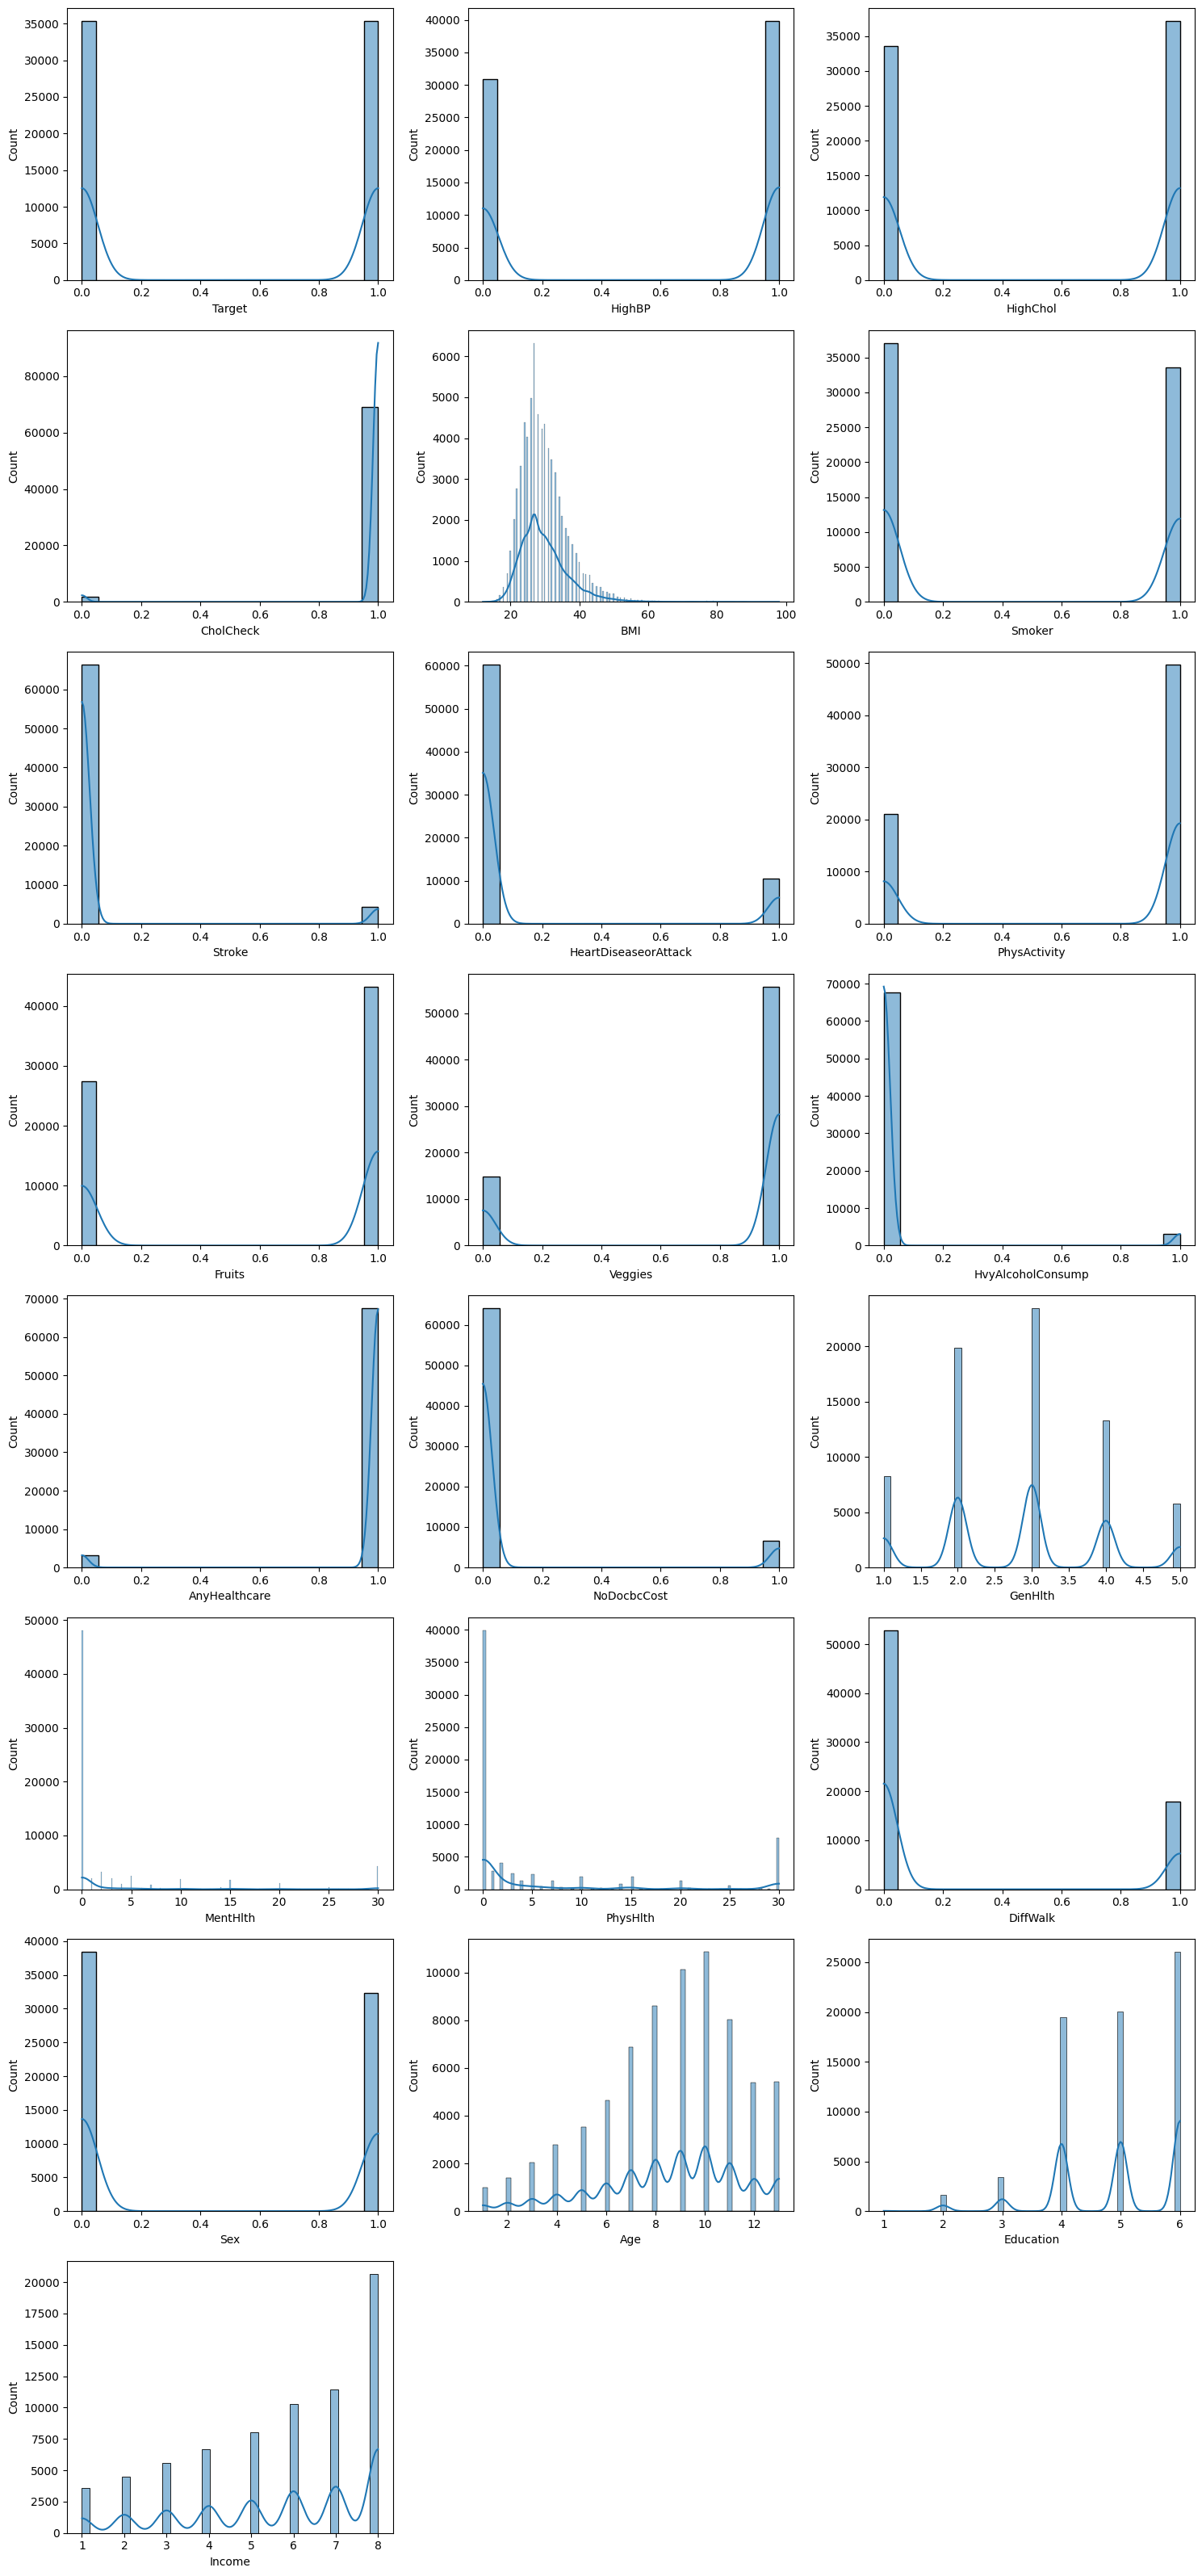

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(df.columns)
cols = 3
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df, x=col, kde=True)

plt.tight_layout()
plt.show()


### Feature distribution analysis

The figure above shows the distribution of all 22 features in the cleaned dataset using histograms with KDE (Kernel Density Estimation). Key observations:

- Binary Features (HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, AnyHealthcare, NoDocbcCost, DiffWalk, Sex):
These features are categorical (0 or 1). Most samples lean heavily toward one class, indicating class imbalance. For example, very few people have had a stroke or heart attack.
- BMI:
The BMI distribution is positively skewed, with most individuals having a BMI between 20 and 40. This aligns with typical population health data.
- GenHlth, Age, Education, Income:
These ordinal categorical features show distinct peaks corresponding to their respective levels.
- GenHlth: Most respondents reported their health as "Good" or "Fair" (values 3 or 4).
- Age: There's a strong representation in middle and older age groups (Age group 9 = 60–64 is most common).
- Education: Majority have completed high school or college.
- Income: Skewed toward lower income brackets, with a notable peak at level 8 ($75k+).
- MentHlth and PhysHlth:
These two continuous features measure the number of unhealthy days in the past 30 days.
  - Most individuals reported very few unhealthy days (peaks at 0), though a few report high counts (30 days), indicating chronic conditions.
- Target:
This is a balanced dataset (50:50 ratio) with equal samples for positive and negative diabetes cases, ensuring fair model training.

## Boxplot

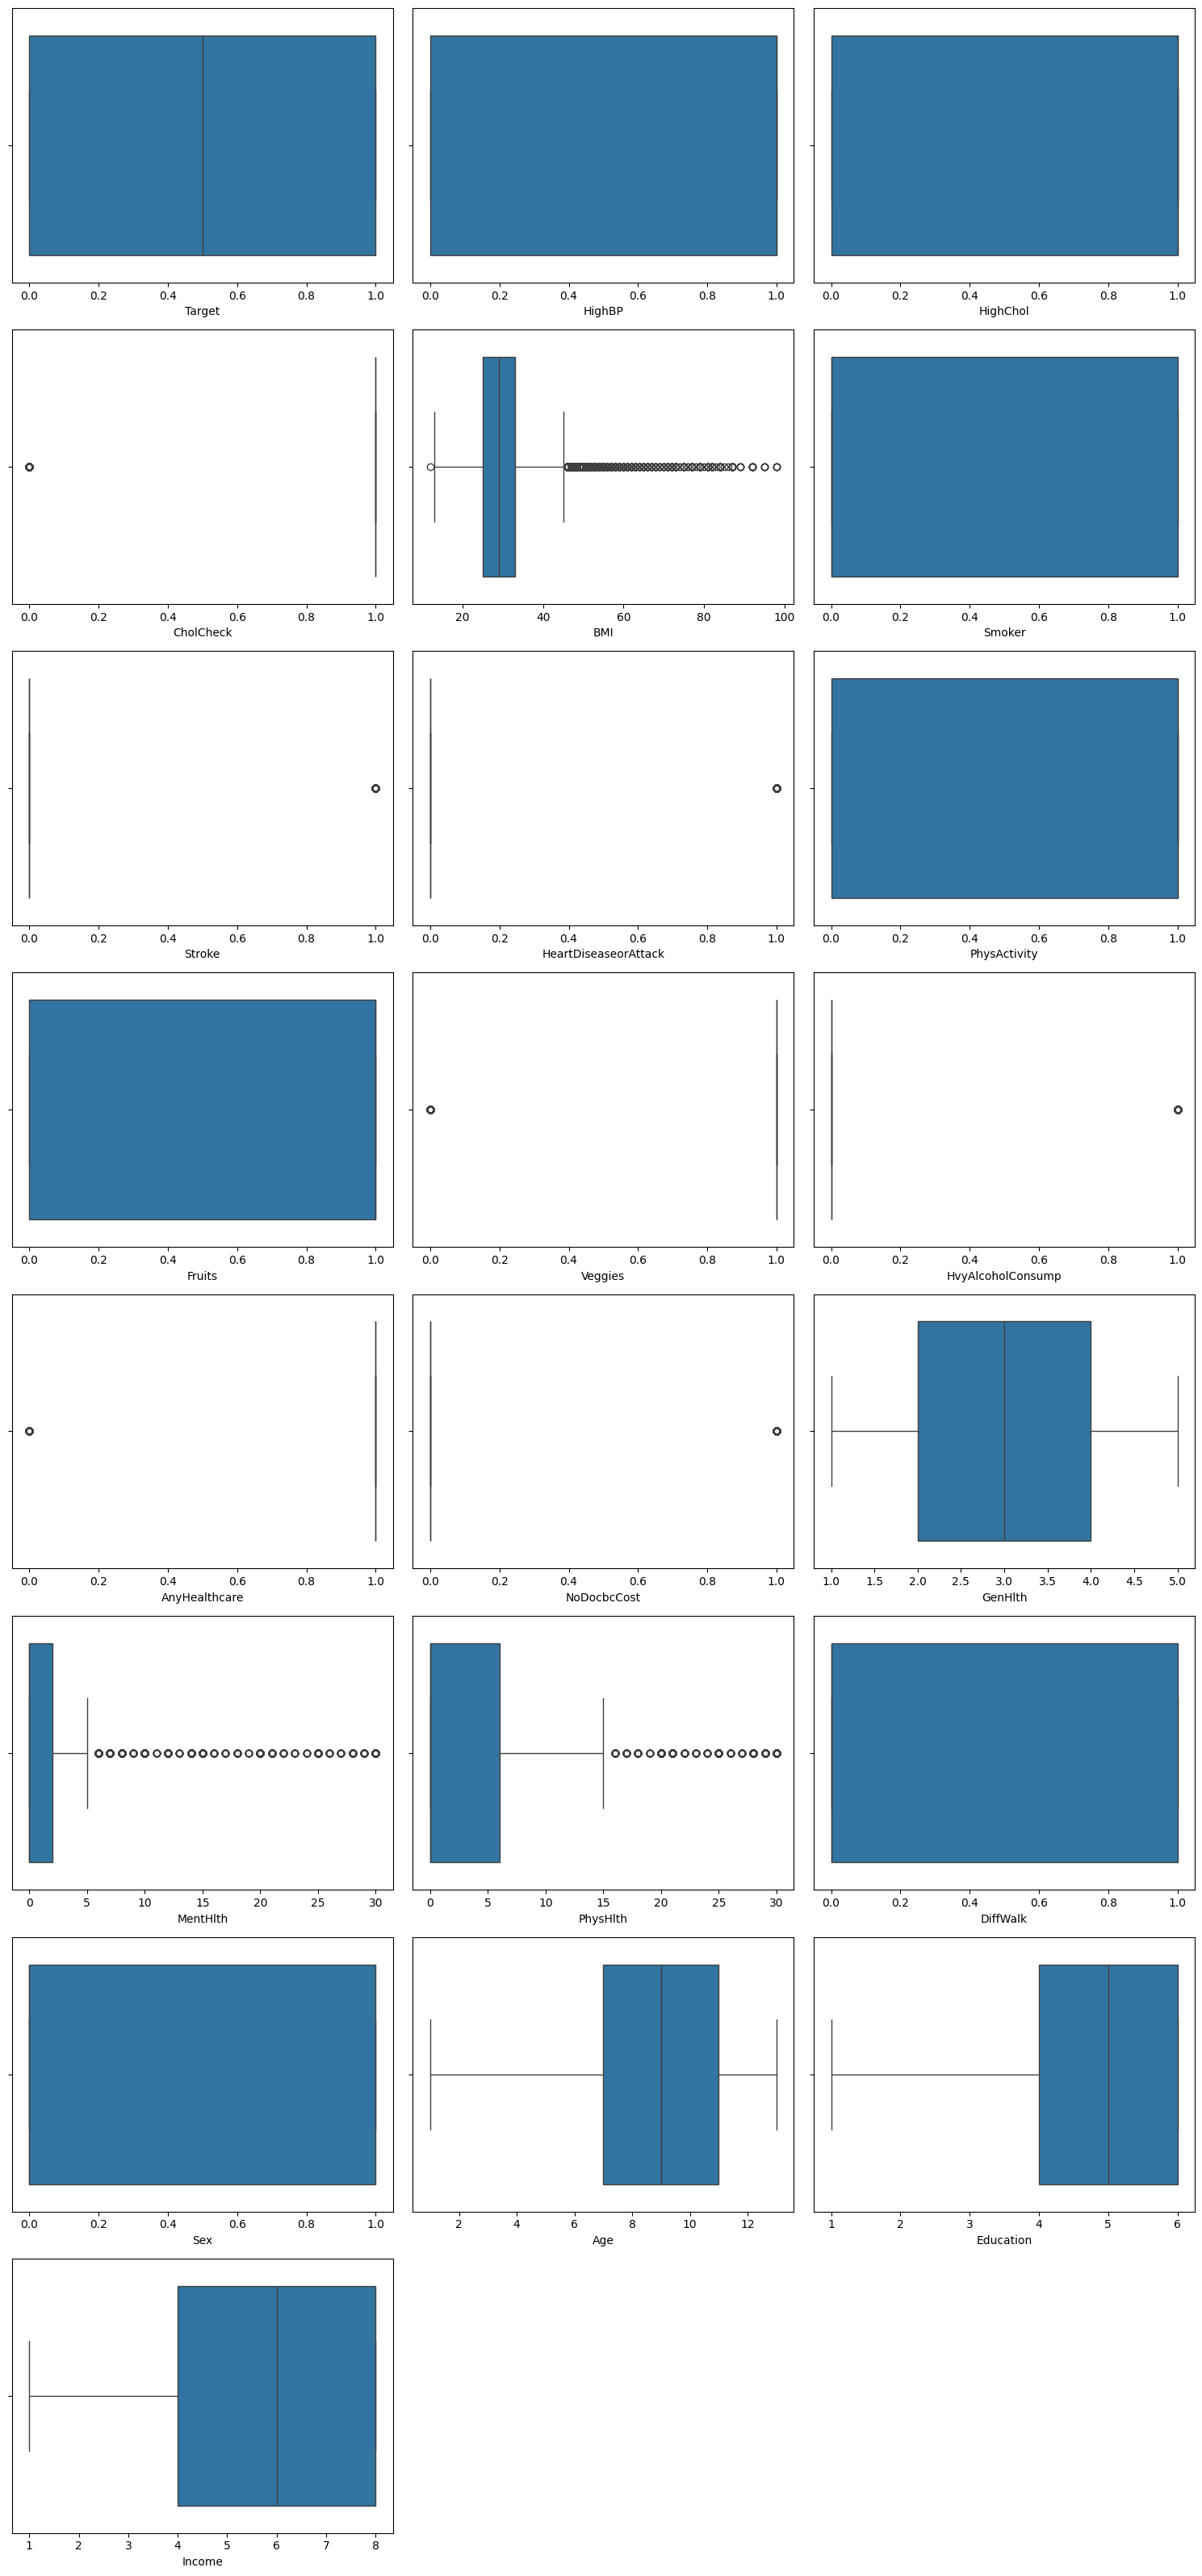

In [ ]:
num_cols = len(df.select_dtypes("number").columns)
cols = 3
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(df.select_dtypes("number").columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df, x=col)

plt.tight_layout()
plt.show()


### Boxplot Analysis – Outliers & Spread
The boxplots above visualize the spread, central tendency, and presence of outliers for each feature. Here are the main takeaways:

Outlier Detection
- BMI: Shows many upper outliers, especially above ~40, suggesting cases of obesity or extreme overweight that could influence diabetes risk.
- MentHlth and PhysHlth: Also have significant outliers, particularly individuals reporting poor health over the full 30-day range. These cases are rare but critical in modeling.
- GenHlth: No true outliers but a limited range (1–5), confirming it's an ordinal scale.
- Binary Variables (HighBP, HighChol, Smoker, etc.): These show no variability in boxplot (only flat bars) due to only two classes (0 or 1).
- CholCheck, Stroke, HeartDiseaseorAttack, Veggies, etc. appear to be highly skewed, with most values at one end (often 1) and very few at 0 — indicating class imbalance.

Symmetry & Spread
- Age and Education: Nicely spread with relatively symmetric distribution, showing good variation among respondents.
- Income: Slight right skew with most values in higher income brackets.
- NoDocbcCost: Most values at 0 with very few at 1 — indicating few people had cost barriers to healthcare.

Implications
- Outliers in continuous variables (like BMI, MentHlth, PhysHlth) may influence model predictions. Scaling or transformations might help.
- Binary categorical variables require no scaling but should be checked for imbalance, which might affect training.
- The presence of many class-imbalanced features highlights the need to monitor feature importance and potentially apply sampling strategies or regularization.

## Scatterplot

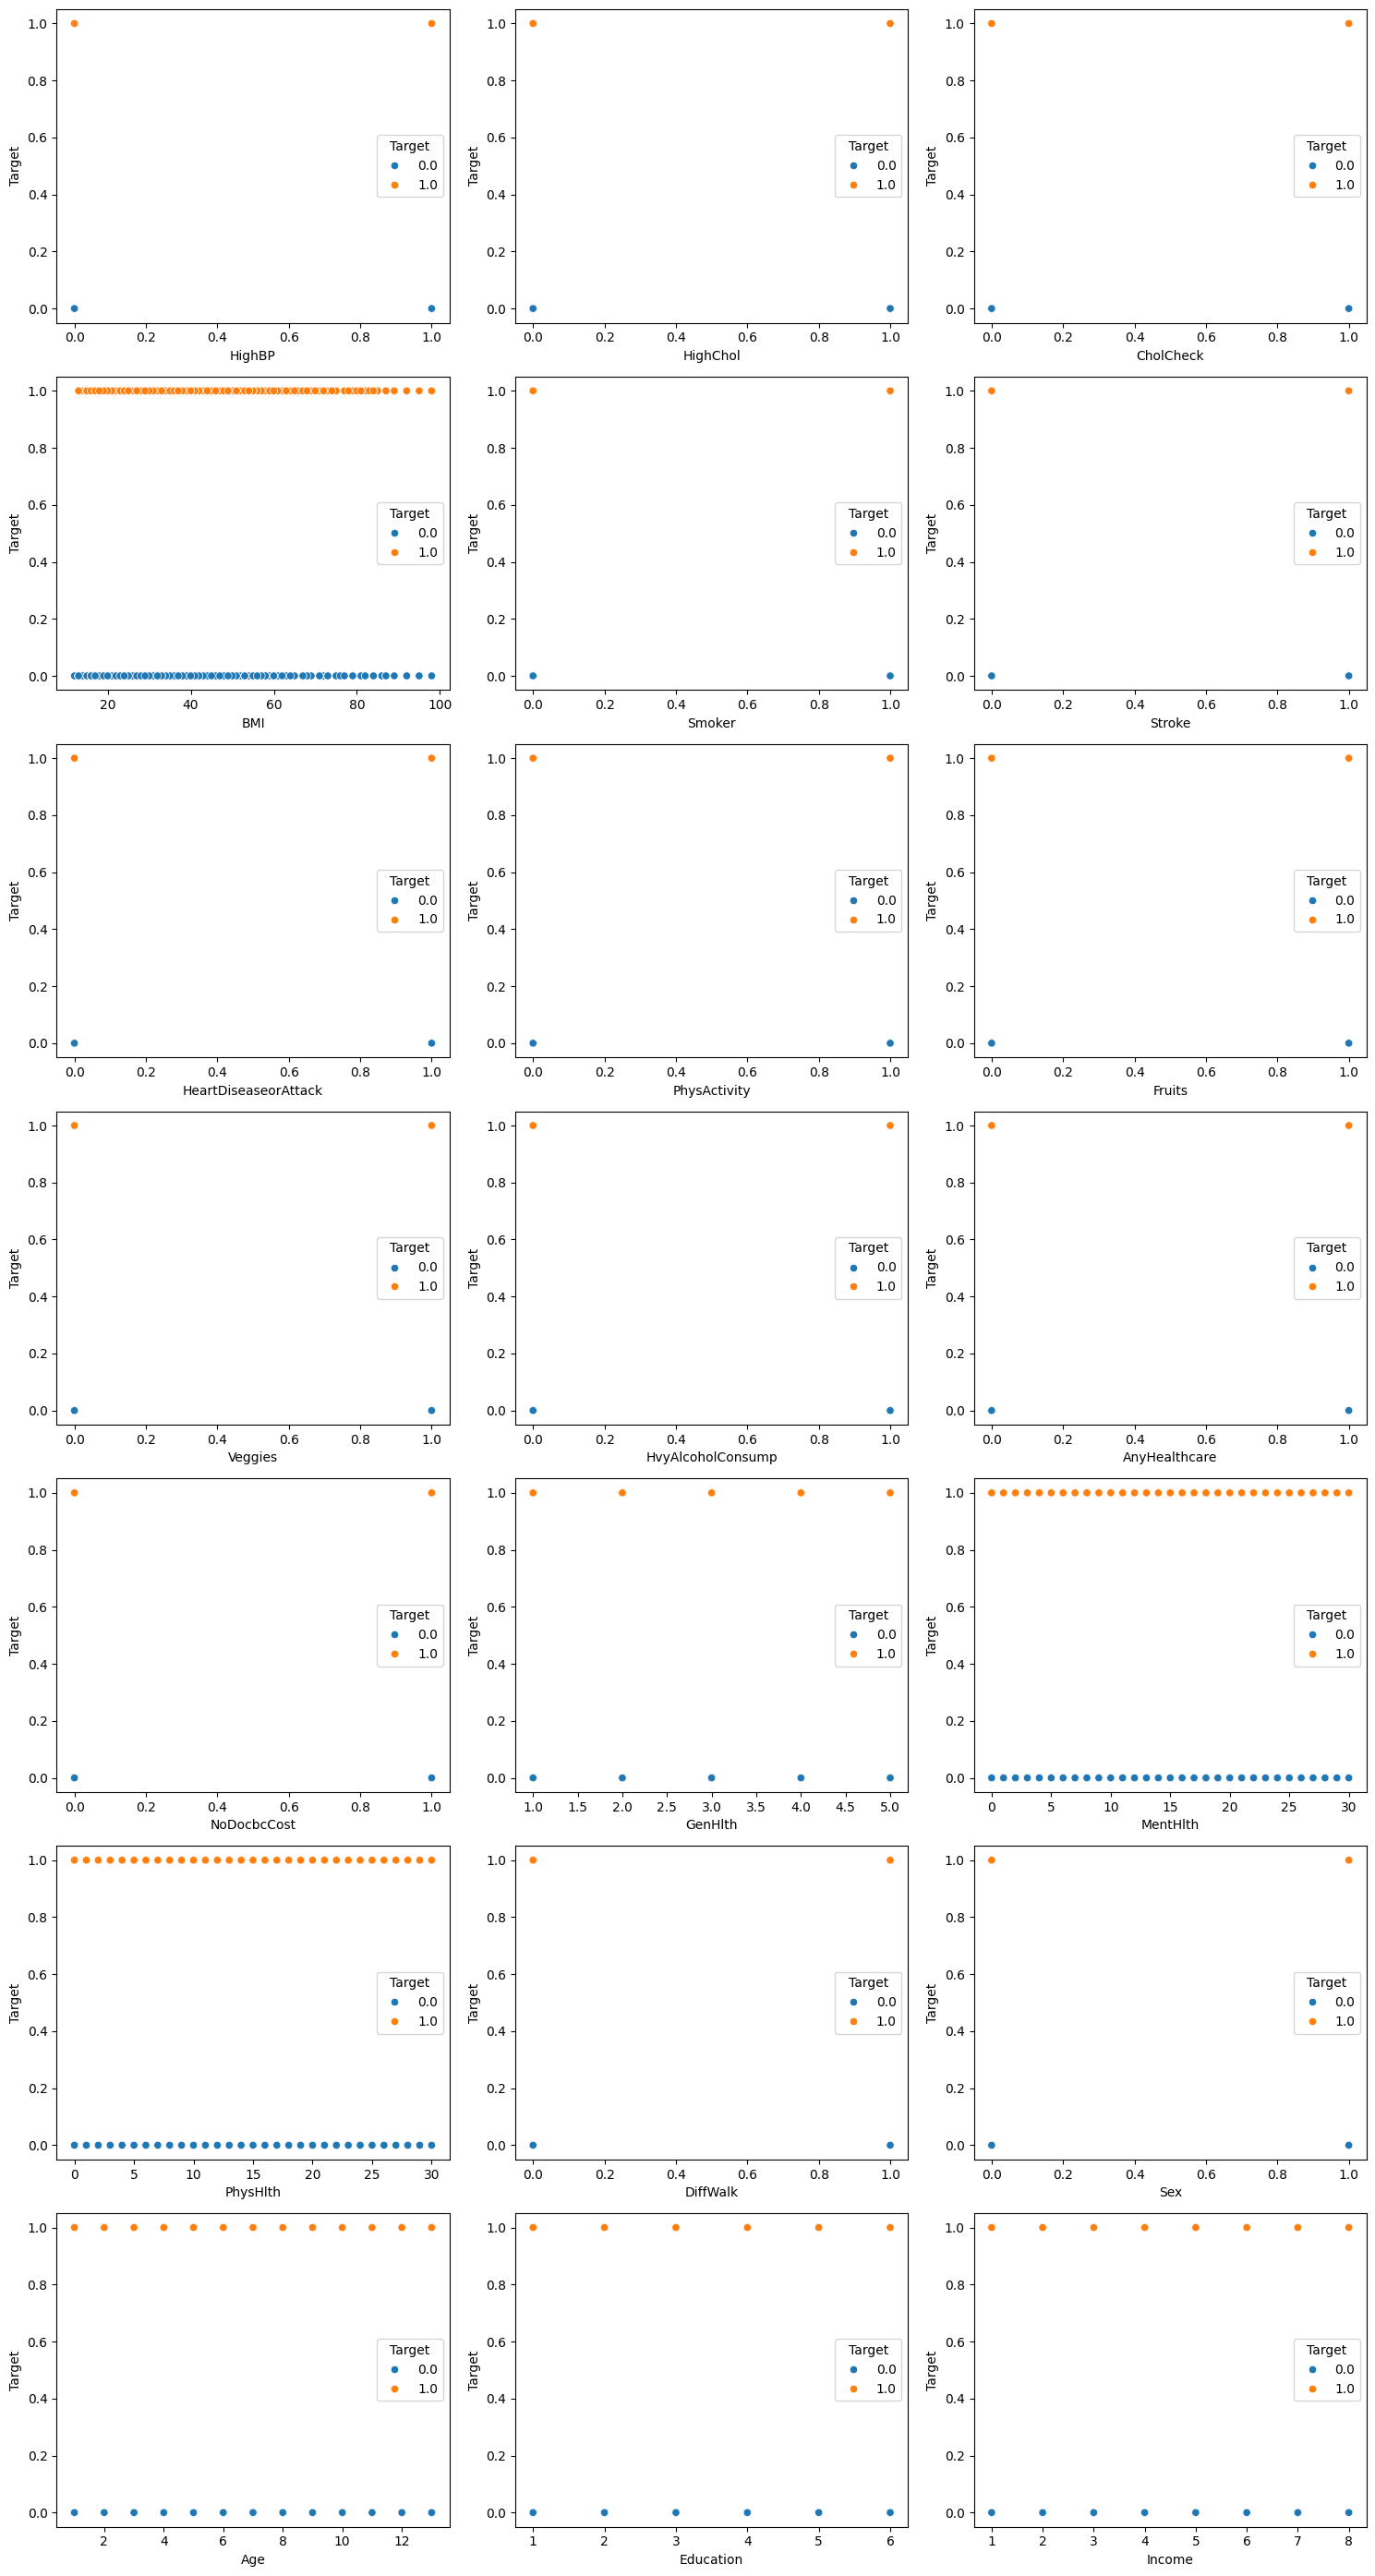

In [ ]:
num_cols = len(df.drop(columns=["Target"]).select_dtypes("number").columns)
cols = 3
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(df.drop(columns=["Target"]).select_dtypes("number").columns):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df, x=col, y="Target", hue="Target")

plt.tight_layout()
plt.show()


### Feature vs Target Relationship – Scatterplot Insights
These scatterplots provide visual intuition on how each feature relates to diabetes status (Target: 0 = No diabetes, 1 = Has diabetes):

Features with Visible Correlation:
- HighBP & HighChol: Patients with diabetes (Target=1) tend to cluster at value = 1, indicating a strong positive relationship between high blood pressure/cholesterol and diabetes risk.
- GenHlth: Higher values (indicating poorer health) are associated with more diabetic individuals. There's a clear upward trend in risk from “excellent” (1) to “poor” (5).
- DiffWalk: Those with walking difficulties (value = 1) appear predominantly in the diabetic group, suggesting a potential link with mobility issues.
- BMI: Diabetic individuals cluster more at higher BMI levels, reaffirming that obesity is a major risk factor.
- Age: Higher age group values (e.g., 10–13) are associated with increased diabetes occurrence, confirming age is a risk factor.

Lifestyle & Behavioral Factors:
- PhysActivity: A lack of physical activity (value = 0) is slightly more common in diabetic cases.
- HvyAlcoholConsump, Fruits, and Veggies: Show little direct separation between diabetic and non-diabetic individuals in this visualization. Their impact might be better captured by multivariate analysis or SHAP values.
- Smoker: While not a strong visual separator, there’s a slight concentration of diabetic individuals among smokers (value = 1).

Demographic Factors:
- Income: Lower income levels (1–3) seem to have a slightly higher prevalence of diabetes compared to higher income groups.
- Education: Less visual separation, but lower education (1–3) might correlate mildly with diabetes risk.
- Sex: Distribution looks balanced; no strong visual trend seen here.

Near-Constant Variables:
- CholCheck and AnyHealthcare are heavily skewed toward 1 for all samples, showing very limited variance, thus offering little predictive power alone.

## Heatmap

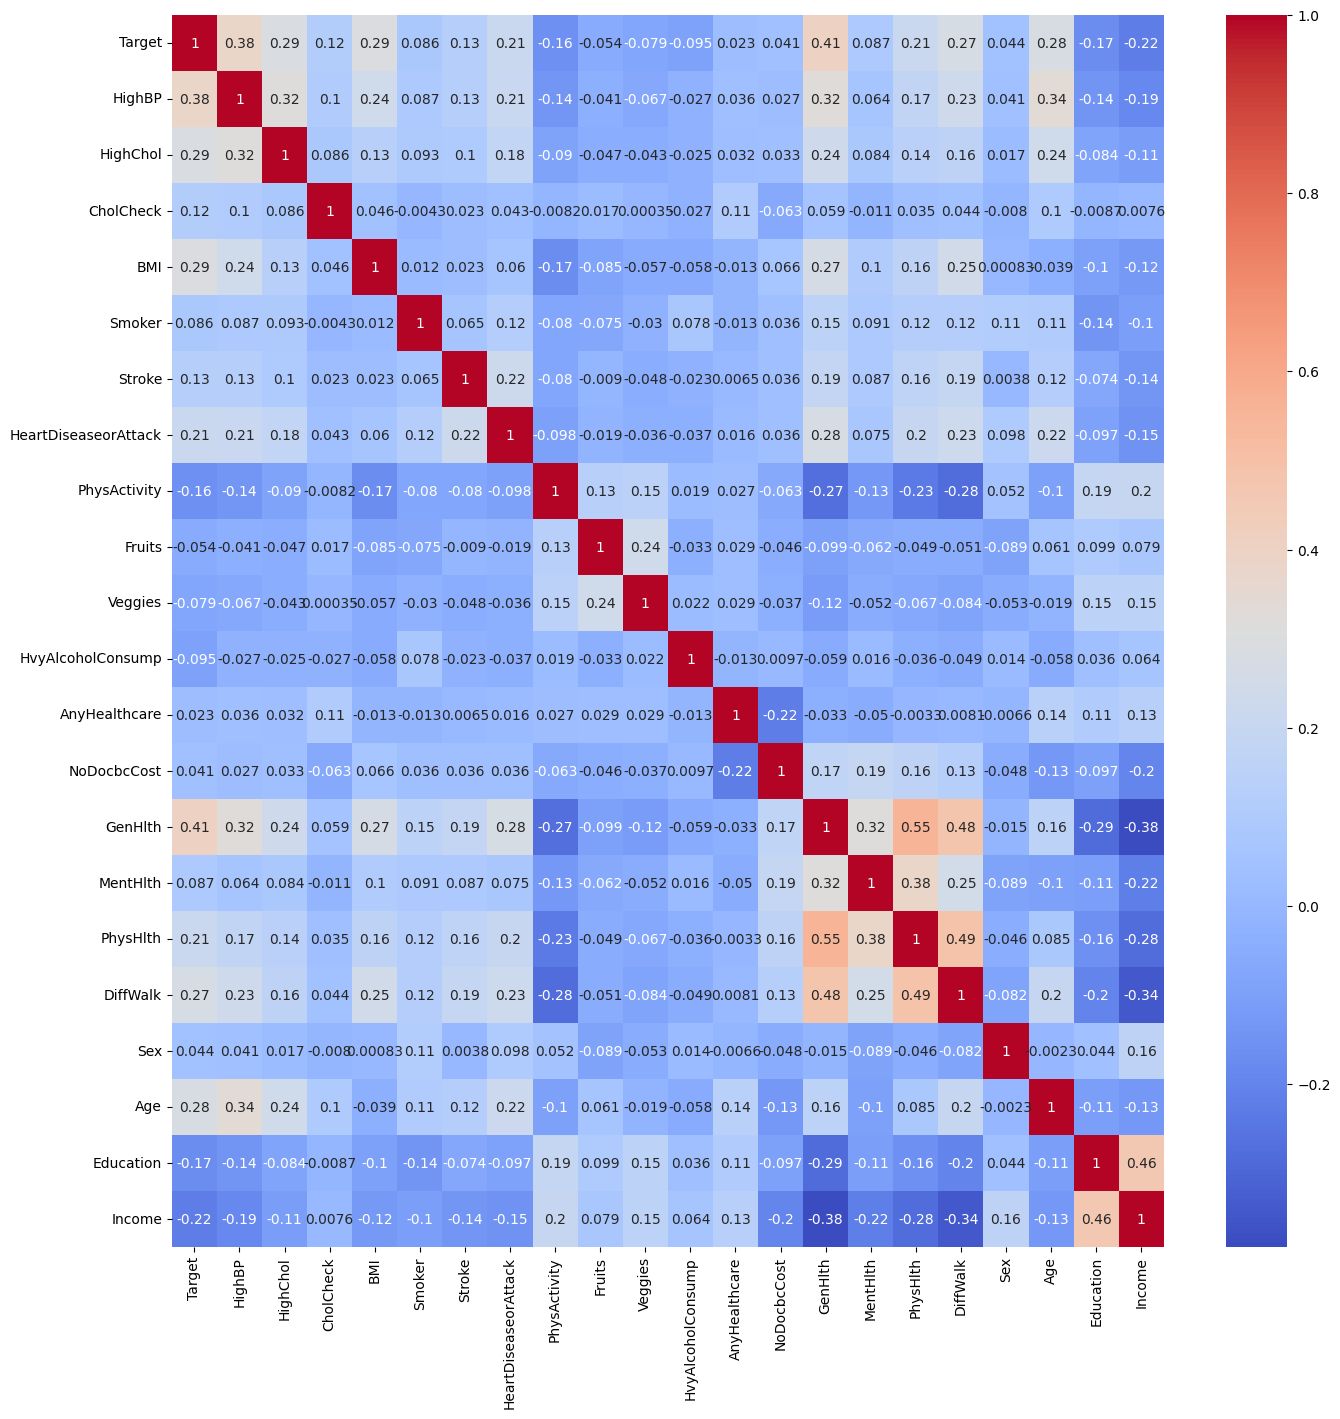

In [ ]:
corr_df = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_df, cmap="coolwarm", annot=True)
plt.show()

### Correlation Heatmap Insights – Diabetes Dataset

This correlation matrix visualizes the pairwise Pearson correlation coefficients between all features. Below are key insights, particularly those related to the `Target` variable (indicating diabetes status).

---

### Top Features Positively Correlated with Diabetes (`Target`)

| Feature               | Correlation | Interpretation                                                                 |
|-----------------------|-------------|---------------------------------------------------------------------------------|
| **GenHlth**           | **0.41**    | Strongest positive correlation. Poor general health is strongly linked to diabetes. |
| **HighBP**            | 0.38        | High blood pressure significantly increases diabetes risk.                     |
| **Age**               | 0.34        | Older individuals tend to have a higher risk of diabetes.                      |
| **HighChol**          | 0.29        | High cholesterol moderately contributes to diabetes risk.                      |
| **HeartDiseaseorAttack** | 0.21     | History of heart disease is moderately associated with diabetes.              |
| **BMI**               | 0.19        | Higher BMI is correlated with increased diabetes risk.                         |

---

### Features Negatively Correlated with Diabetes

| Feature        | Correlation | Interpretation                                                             |
|----------------|-------------|-----------------------------------------------------------------------------|
| **PhysActivity** | **-0.15**  | Physically active people are less likely to be diabetic.                   |
| **Income**      | -0.22       | Higher income tends to reduce diabetes risk, possibly due to better lifestyle. |
| **Education**   | -0.14       | More education is slightly linked with reduced diabetes prevalence.        |
| **Fruits**      | -0.05       | Healthy eating (fruit intake) slightly lowers risk.                        |
| **Veggies**     | -0.08       | Vegetable intake shows slight negative correlation with diabetes.          |

---

### Other Notable Feature Relationships (Multicollinearity)

| Feature Pair             | Correlation | Note                                                                 |
|--------------------------|-------------|----------------------------------------------------------------------|
| **GenHlth ↔ PhysHlth**   | 0.55        | Strongly related — poor general health coincides with poor physical health. |
| **GenHlth ↔ MentHlth**   | 0.32        | Moderate correlation between general and mental health.              |
| **Age ↔ Income**         | -0.13       | Slight trend where older people tend to report lower income levels. |
| **Age ↔ GenHlth**        | 0.27        | Older age moderately correlates with worse general health.          |

---

### Summary

- The **most relevant predictors of diabetes** (based on correlation) are: `GenHlth`, `HighBP`, `Age`, `HighChol`, and `BMI`.
- Lifestyle and demographic variables like `PhysActivity`, `Income`, and `Education` show negative correlation, supporting common health knowledge.
- Some features like `AnyHealthcare`, `CholCheck`, and `Smoker` display near-zero correlation and may not significantly impact prediction in a linear sense.

> **Note**: Correlation does not imply causation — additional feature importance (e.g., SHAP) and modeling steps are needed for confirmatory insights.


## Countplot

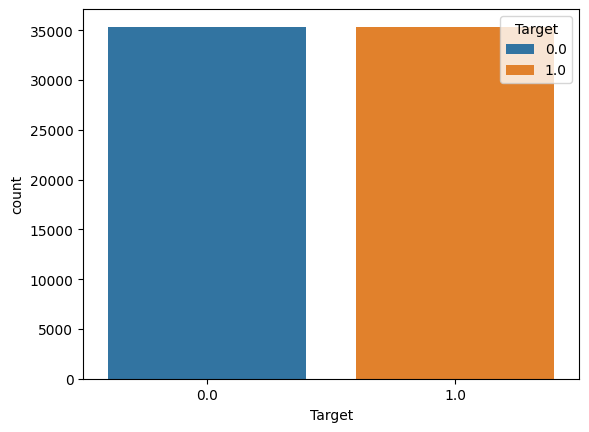

In [ ]:

sns.countplot(x="Target", hue="Target", data=df)
plt.show()

# 3. Preprocessing

## Check missing value

In [ ]:
df.isna().sum()

,0
Target,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Remove Duplicates

In [ ]:
df.duplicated().sum()

np.int64(1635)

In [ ]:
# Quickly inspect how many exact duplicates exist (full‐row duplicates including the target)
n_exact_dupes = df.duplicated().sum()
print(f"Exact duplicate rows (including same Target): {n_exact_dupes}")

# Inspect those duplicate rows if you want to confirm they’re indeed redundant:
dupe_rows = df[df.duplicated(keep="first")]
print(dupe_rows.head())

Exact duplicate rows (including same Target): 1635
      Target  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
602      0.0     0.0       0.0        1.0  22.0     0.0     0.0   
689      0.0     0.0       0.0        1.0  26.0     0.0     0.0   
891      0.0     0.0       0.0        1.0  24.0     0.0     0.0   
1092     0.0     0.0       0.0        1.0  21.0     0.0     0.0   
1326     0.0     1.0       0.0        1.0  29.0     0.0     0.0   

      HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
602                    0.0           1.0     1.0  ...            1.0   
689                    0.0           1.0     1.0  ...            1.0   
891                    0.0           1.0     1.0  ...            1.0   
1092                   0.0           1.0     1.0  ...            1.0   
1326                   0.0           1.0     0.0  ...            1.0   

      NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
602           0.0      1.0       0.0      

In [ ]:
df_cleaned = df.drop_duplicates()
print(f"Dataset setelah menghapus duplikat: {df_cleaned.shape}")


Dataset setelah menghapus duplikat: (69057, 22)


In [ ]:
df_cleaned.nunique()

,0
Target,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
df_cleaned

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_cleaned.drop(columns=["Target"])
y = df_cleaned["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaling Data

In [ ]:
features_scaled = [
    "BMI",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "Age",
    "Education",
    "Income"
]


scaler = StandardScaler()
X_train[features_scaled] = scaler.fit_transform(X_train[features_scaled])
X_test[features_scaled] = scaler.transform(X_test[features_scaled])

print("\nExample 5 rows of the features that have been scaled:")
print(X_train[features_scaled].head())

## Visualize Distributions of Scaled Features

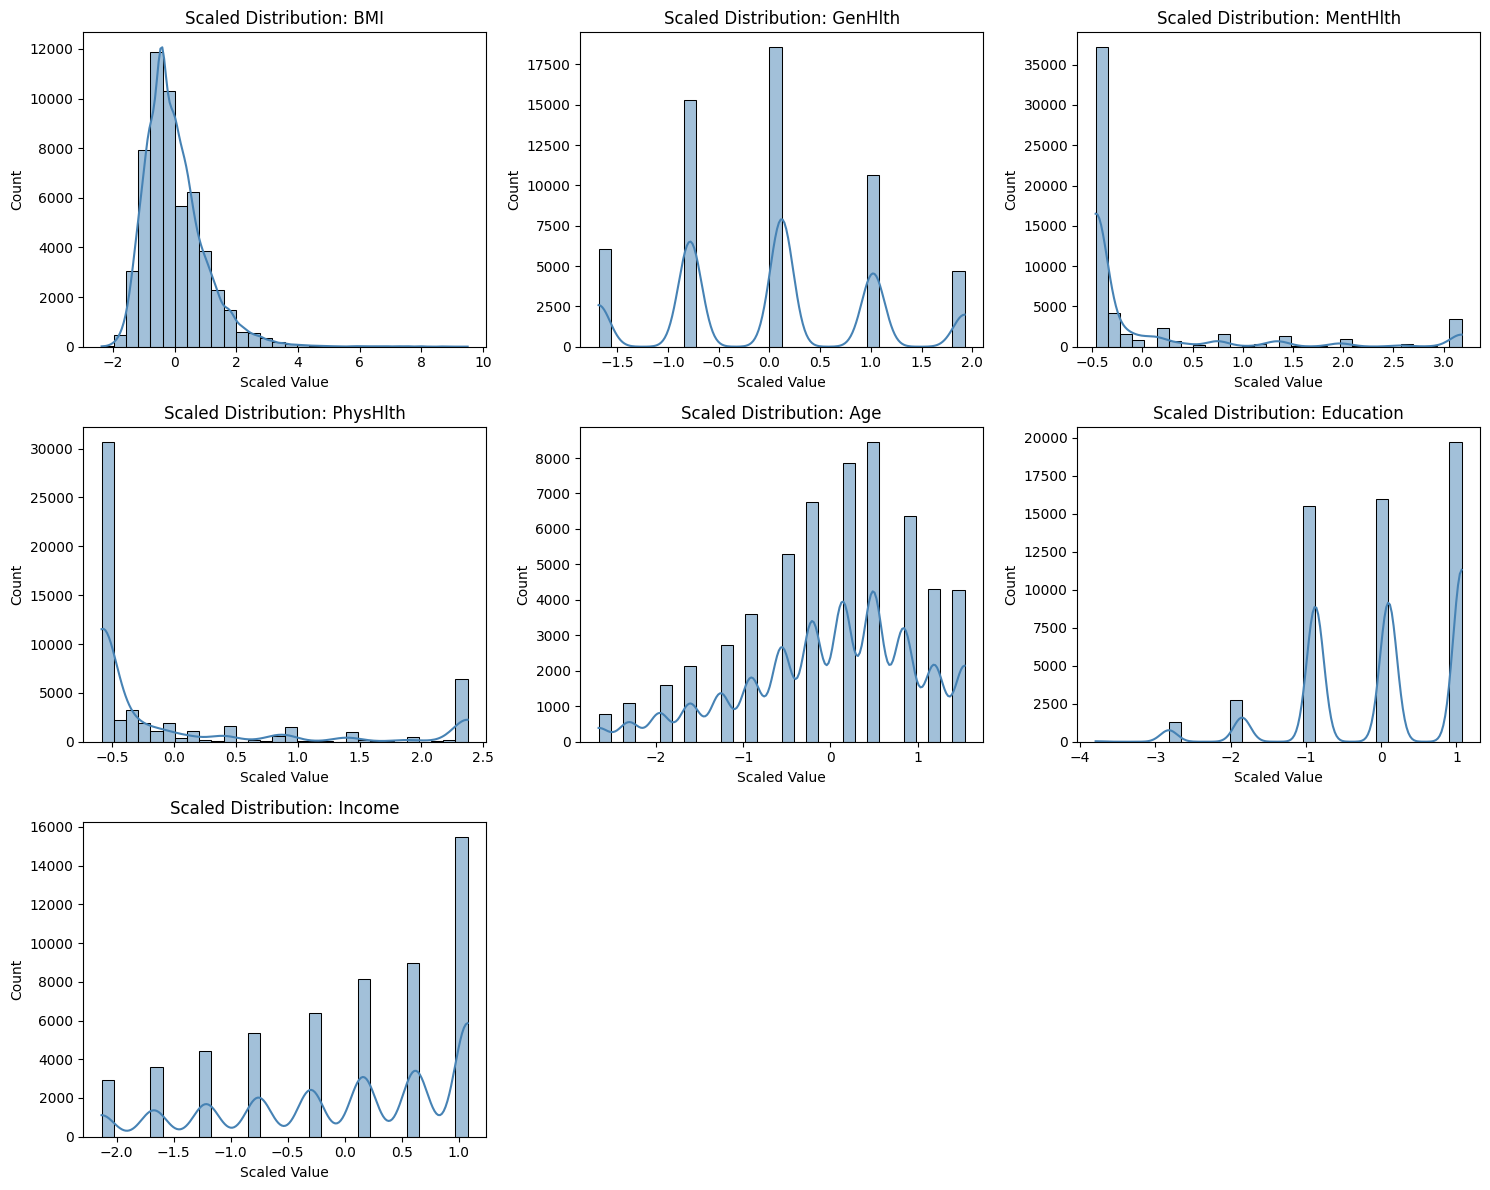

In [ ]:
# Features that were scaled
features_scaled = [
    "BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"
]

# Create subplots
num_cols = 3
num_features = len(features_scaled)
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, feature in enumerate(features_scaled):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train[feature], kde=True, bins=30, color='steelblue')
    plt.title(f"Scaled Distribution: {feature}")
    plt.xlabel("Scaled Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Scaled Feature Distributions – Insights
The following plots show the distribution of numerical features after applying StandardScaler. This helps normalize different feature ranges before model training.

BMI (Body Mass Index)
- Distribution is right-skewed, even after scaling.
- Indicates the presence of individuals with extremely high BMI.
- StandardScaler handles the spread, but outliers remain visible.

GenHlth (General Health)
- Discrete values from 1 to 5 (Excellent to Poor), hence the multi-modal peaks.
- Scaling converts them to standard normal space but retains the step pattern due to ordinal nature.
- MentHlth (Days Mental Health Not Good)
Highly right-skewed, most individuals report low or zero bad mental health days.
- A few outliers exist with higher mental distress (30 days).

PhysHlth (Days Physical Health Not Good)
- Similar to MentHlth: heavily right-skewed with most reporting 0 bad physical health days.
- Scaling helps compress the distribution but skewness remains.

Age
- Multimodal distribution due to categorical binning (13 groups).
- Scaling has centered and normalized it reasonably well.

Education
- Also discrete (6 levels), producing visible spikes.
- StandardScaler effectively standardizes the feature while preserving step-like ordinal nature.

Income
- Contains 8 ordered bins.
- Post-scaling shows near-uniform stepped distribution, well-centered.

Summary
- Most features retain their original ordinal or skewed patterns even after scaling, which is expected for categorical/ordinal variables.
- StandardScaler does not remove skewness or make distributions normal — it only standardizes the mean and variance.
- No major scaling issues observed — the data is well-prepared for model input.

## Value count to check data distributions on the training data

In [ ]:
print(y_train.value_counts(normalize=True))

Target
1.0    0.508227
0.0    0.491773
Name: proportion, dtype: float64


### Insight:
- The class distribution is nearly balanced with a ~50:50 split between the two classes:
  - 1.0 = Positive diabetes diagnosis (50.8%)
  - 0.0 = No diabetes diagnosis (49.2%)
- Since the target classes are well-balanced, no additional resampling techniques such as:
  - SMOTE (Synthetic Minority Over-sampling Technique)
  - Random Oversampling/Undersampling
are necessary at this stage.
- This ensures fair training and reliable performance metrics without introducing synthetic bias.

# Modelling

## Chosen models and justification
1. Logistic Regression
- Why: Acts as a simple and interpretable baseline model.
- Strengths: Works well on linearly separable data, fast to train, provides clear probability outputs and feature importance via coefficients.
- Use case: Good first step for binary classification problems like diabetes prediction.

2. Random Forest
- Why: Powerful ensemble of decision trees that can handle non-linear relationships.
- Strengths: Robust to outliers and overfitting, doesn't require feature scaling, and performs well out of the box.
- Use case: Useful for understanding feature importance and capturing complex patterns in health data.

3. XGBoost
- Why: Known for state-of-the-art performance in many Kaggle and real-world datasets.
- Strengths: Efficient, handles missing values well, includes built-in regularization to reduce overfitting.
- Use case: Best choice when aiming for high prediction accuracy in structured/tabular data.


> Conclusion:
This selection strikes a balance between:
- Interpretability (Logistic Regression),
- Robustness (Random Forest),
- and High predictive power (XGBoost).


## Fitting the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Model Evaluation


=== Logistic Regression ===
Cross-Validated Accuracy (5-fold): 0.744 ± 0.005
Confusion Matrix:
[[4861 1931]
 [1592 5428]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      6792
         1.0       0.74      0.77      0.75      7020

    accuracy                           0.74     13812
   macro avg       0.75      0.74      0.74     13812
weighted avg       0.75      0.74      0.74     13812


=== Random Forest ===
Cross-Validated Accuracy (5-fold): 0.731 ± 0.006
Confusion Matrix:
[[4635 2157]
 [1574 5446]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      6792
         1.0       0.72      0.78      0.74      7020

    accuracy                           0.73     13812
   macro avg       0.73      0.73      0.73     13812
weighted avg       0.73      0.73      0.73     13812


=== XGBoost ===
Cross-Validated Accuracy (5-fold): 0.745 ± 

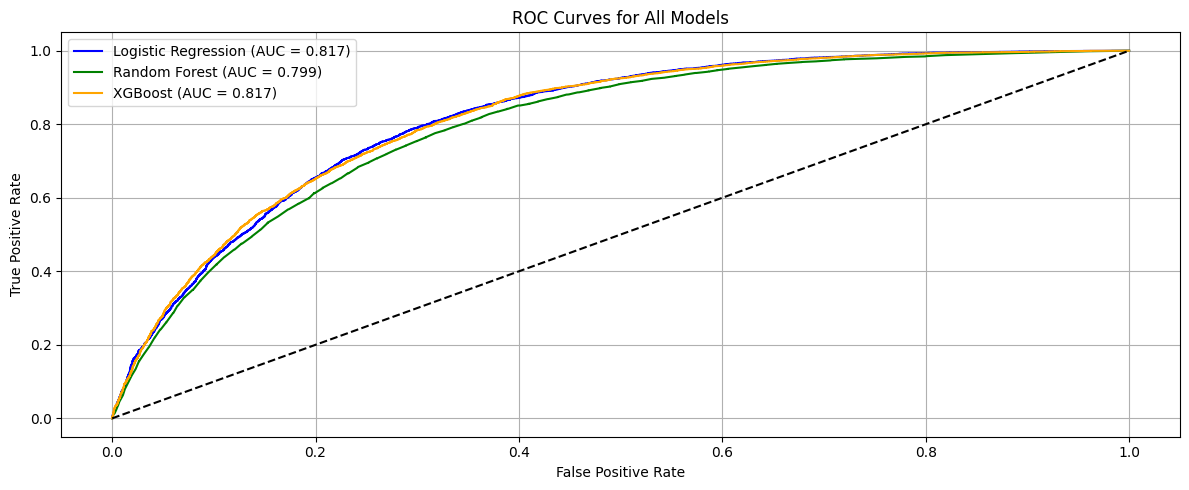

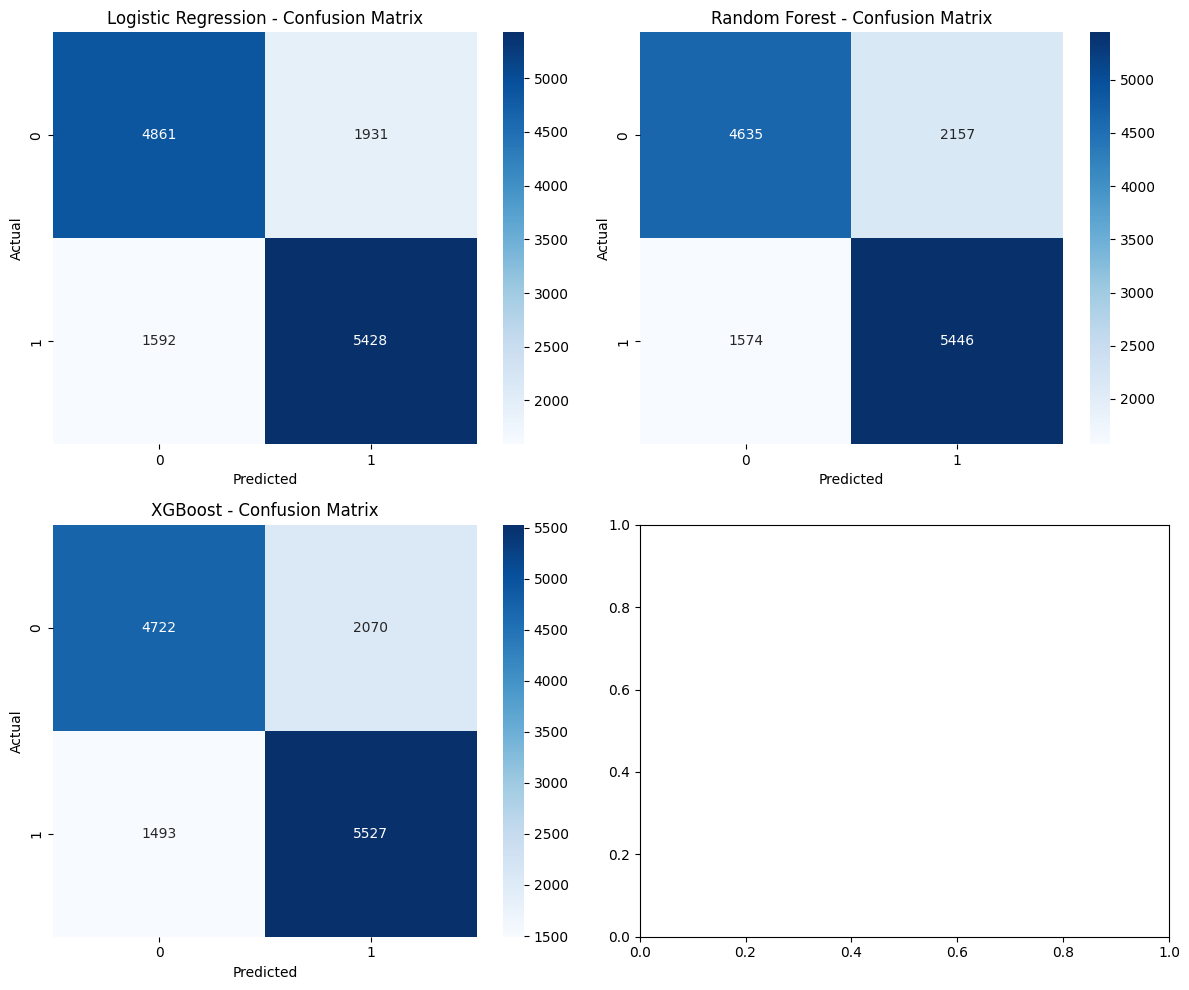

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Set up for plotting
plt.figure(figsize=(12, 5))
colors = ['blue', 'green', 'orange', 'red']

for i, (name, model) in enumerate(models.items()):
    print(f"\n=== {name} ===")

    # Prediction
    y_pred = model.predict(X_test)

    # Cross-validated Accuracy (5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Validated Accuracy (5-fold): {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=colors[i])
    else:
        print("⚠️ ROC Curve skipped (no predict_proba available)")

    # Classification metrics
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### Overall Model Performance Summary

| Model                   | Accuracy | CV Accuracy (Mean ± Std) | Avg. F1 Score | Notes                             |
|-------------------------|----------|--------------------------|----------------|------------------------------------|
| **Logistic Regression** | 74%      | 0.744 ± 0.005            | 0.74           | Best AUC, highly interpretable     |
| **Random Forest**       | 73%      | 0.731 ± 0.006            | 0.73           | Robust, handles non-linearities    |
| **XGBoost**             | 74%      | 0.745 ± 0.006            | 0.74           | Best F1 & Recall for diabetic class |

---

## Insights by Metric

### 1. ROC AUC (Discrimination Power)
- **Logistic Regression** shows the highest ROC AUC (**0.817**), meaning it’s best at separating diabetic vs. non-diabetic cases.
- **XGBoost** follows closely (**0.817**), showing nearly equal discrimination.
- **Random Forest** is slightly lower (**0.799**), but still solid.

> **Best by ROC AUC**: *Logistic Regression* (by a small margin)

---

### 2. Recall for Class 1 (Diabetes Positive)
- **XGBoost** Recall: **0.79** → *Best at identifying true diabetic cases*
- **Logistic Regression**: 0.77
- **Random Forest**: 0.78

> **Best for Recall**: *XGBoost*

---

### 3. Confusion Matrix Analysis
- **XGBoost** has the **lowest false negatives (FN = 1493)** → critical in medical scenarios.
- **Logistic Regression** (FN = 1592) and **Random Forest** (FN = 1574) follow behind.

> *Lower false negatives mean fewer missed diabetes cases* → *XGBoost wins here*

---

### 4. ROC Curve Observations
- All three models have ROC curves **well above the diagonal**, indicating strong predictive ability.  
- **Logistic Regression** and **XGBoost** curves are smoother and better separated.  
- AUC values are all competitive (~0.82), confirming strong performance across models.

---

## Final Conclusion and Model Selection
Based on the evaluation metrics, XGBoost is chosen as the final production model due to the following reasons:

- It achieved the highest recall, ensuring more diabetic patients are correctly identified.
- It has very competitive AUC and strong F1-score, matching Logistic Regression’s performance while offering better detection of positives.
- It resulted in the lowest number of false negatives, which is critical in healthcare predictions.
- It can be effectively combined with SHAP for interpretability, making it not only powerful but also explainable.




## Feature Selection

100%|===================| 55126/55245 [05:01<00:00]       

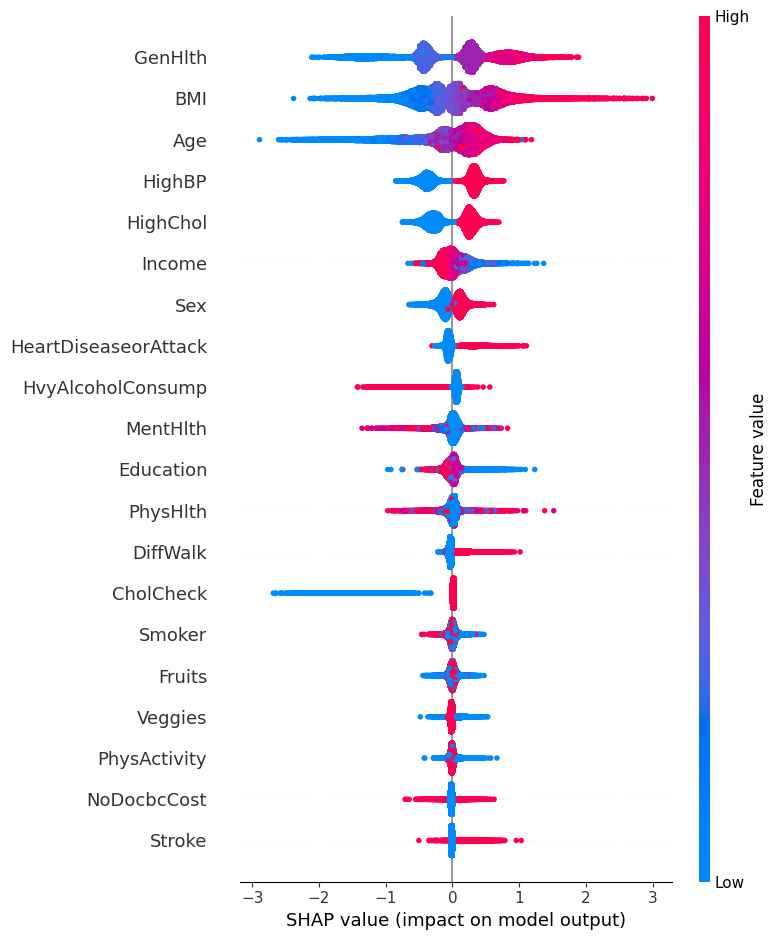

In [ ]:
import shap

# SHAP Explainer untuk XGBoost
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)


### SHAP Insights

The SHAP (SHapley Additive exPlanations) summary plot above shows how each feature impacts the XGBoost model’s output (i.e., the predicted probability of diabetes). Here are the key observations:

1. **Top Features by Impact (Magnitude of SHAP Value)**
   - **GenHlth** (General Health) has the largest spread of SHAP values, indicating it is the most influential feature. Patients reporting poorer general health (higher “GenHlth” values) push the prediction toward a higher diabetes risk.
   - **BMI** (Body Mass Index) is the next most important feature. Higher BMI values (colored red) correspond to positive SHAP values, meaning that as a patient’s BMI increases, the model is more likely to predict diabetes.
   - **Age** is third in importance. Older age categories (also shown in red) tend to increase the predicted risk.
   - **HighBP** (High Blood Pressure) and **HighChol** (High Cholesterol) follow closely: when a patient has “HighBP = 1” or “HighChol = 1,” that pushes SHAP values to the right (higher risk).
   - **Income** and **Sex** appear in the mid-tier of importance: lower income (blue) and male sex (red) both slightly shift predictions toward higher risk, but their overall impact is smaller than GenHlth, BMI, and Age.
   - **HeartDiseaseorAttack** (history of heart disease) also has a positive SHAP effect: patients with a history of heart disease (red) get nudged toward higher diabetes risk.

2. **Directionality: How Feature Values Affect Risk**
   - Each dot represents one survey respondent. The dot’s color encodes the raw feature value (blue = low, red = high).  
   - For **GenHlth**:
     - Blue (low GenHlth = “excellent” or “very good”) clusters left of zero → reduces predicted risk.  
     - Red (high GenHlth = “fair” or “poor”) shifts toward the far right → increases predicted risk.
   - For **BMI**:
     - Low-BMI individuals (blue) cluster around negative or near-zero SHAP values → lower risk.  
     - High-BMI individuals (red) appear far to the right → higher risk.
   - For **Age**:
     - Younger age categories (blue) have negative or low SHAP contributions.  
     - Older age categories (red, particularly categories 11–13) contribute positive SHAP values, elevating risk.
   - For **HighBP** and **HighChol**:
     - When the feature = 0 (no high blood pressure/cholesterol, shown in blue), most SHAP values lie left of zero.  
     - When the feature = 1 (red), SHAP values shift right, meaning those respondents are more likely to be predicted diabetic.
   - For **Income**:
     - Lower Income (blue, e.g., category 1–3) slightly nudges risk upward if paired with other risk factors.  
     - Higher Income (red, category 7–8) tends to push SHAP values left or near zero, indicating a protective effect.

3. **Less Influential Features (Centered Around Zero)**
   - **HvyAlcoholConsump**, **MentHlth**, **Education**, **PhysHlth**, **DiffWalk**, **CholCheck**, **Smoker**, **Fruits**, **Veggies**, **PhysActivity**, **NoDocbcCost**, **Stroke** all cluster tightly around zero, with a narrow SHAP value range.  
   - This indicates these features have comparatively smaller impact on the model’s final prediction when the top 8 features are already present.

4. **Interpretation for a Single Patient**
   - If a patient’s dot for each feature is red and located far to the right (e.g., poor GenHlth, high BMI, older age, high blood pressure, high cholesterol), the sum of SHAP contributions will push the final probability well above 0.5 → high predicted diabetes risk.
   - Conversely, a patient with blue dots on GenHlth, BMI, and Age positions those features on the left side, collectively lowering risk.

---

### Summary

- **Most Critical Risk Factors**: Poor general health, high BMI, older age, presence of high blood pressure, and high cholesterol are the single largest contributors to the model’s decision.  
- **Protective Factors**: Higher income levels and younger age categories tend to reduce predicted risk.  
- **Model Focus**: The model relies heavily on a handful of strong predictors; many other survey questions (e.g., fruit/vegetable consumption, physical activity) have minimal marginal impact once those top predictors are accounted for.  

By using these SHAP insights, clinicians and stakeholders can understand precisely which factors are driving each patient’s risk score and prioritize interventions on those high‐impact features (e.g., targeting weight management, blood pressure control, and overall health improvement).  


In [ ]:
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_importance)[::-1][:8]
top_features = X_train.columns[top_indices]
print("Top features from SHAP:", list(top_features))


Top features from SHAP: ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'Income', 'Sex', 'HeartDiseaseorAttack']


In [ ]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

xgb.fit(X_train_top, y_train)
y_pred = xgb.predict(X_test_top)


## Train model with top features from SHAP (Untuned)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      6792
         1.0       0.73      0.79      0.76      7020

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812

ROC AUC Score: 0.8152693780012684
Cross-validated Accuracy scores: [0.74468278 0.73599421 0.74269165 0.74667391 0.73807584]
Mean CV Accuracy 0.7416236763508011


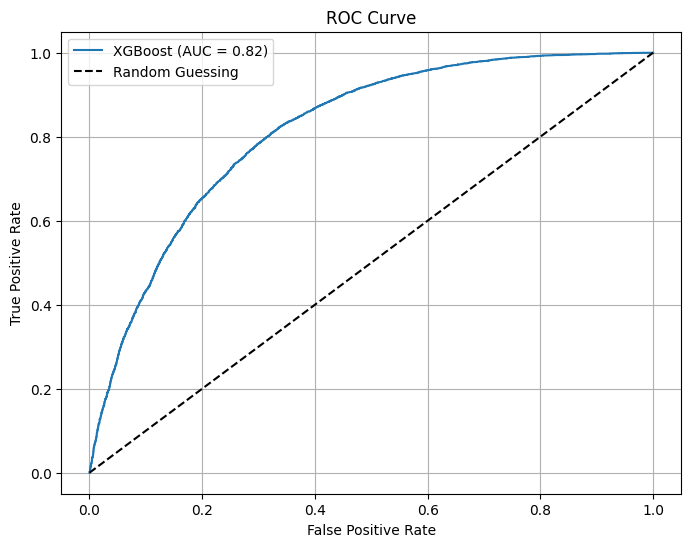

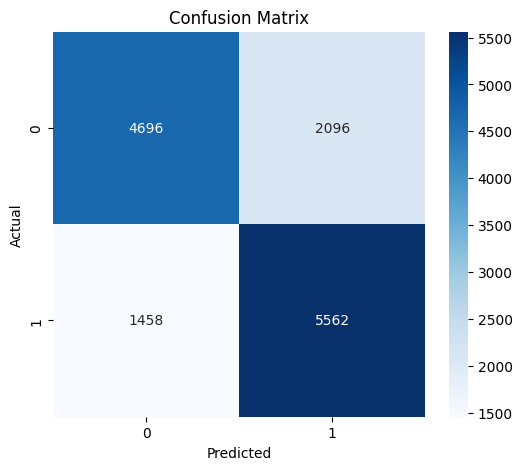

In [ ]:
from sklearn.model_selection import StratifiedKFold

# === Refit the model on top features ===
xgb.fit(X_train_top, y_train)

# === 1. Classification Report ===
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === 2. ROC AUC Score ===
y_proba = xgb.predict_proba(X_test_top)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# === 3. Cross-Validation (Stratified 5-Fold) ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train_top, y_train, cv=cv, scoring="accuracy")
print("Cross-validated Accuracy scores:", cv_scores)
print("Mean CV Accuracy", np.mean(cv_scores))

# === 4. ROC Curve Plot ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 5. Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Model Evaluation with Top SHAP Features (XGBoost without Tuned)

### 1. Model Performance Summary
| Metric                   | Value       |
|--------------------------|-------------|
| **Accuracy (Test Set)**  | 74%         |
| **ROC AUC (Test Set)**   | 0.815       |
| **F1 Score (Class 1)**   | 0.76        |
| **Recall (Class 1)**     | 0.79        |
| **False Negatives (FN)** | 1458        |
| **CV Accuracy (5-Fold)** | 0.742 ± ~0.004 |

---

### 2. SHAP-Based Feature Selection
Top 8 features identified via SHAP:
['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'Income', 'Sex', 'HeartDiseaseorAttack']


> These features were selected based on their mean absolute SHAP impact and used to retrain the final model for better interpretability and efficiency.

---

### 3. Confusion Matrix Analysis
- **True Positives (Diabetes correctly detected)**: 5562  
- **False Negatives (Diabetes missed)**: 1458  
- Lower false negatives are crucial in medical applications → the model is **sensitive to diabetic cases**

---

### 4. ROC Curve Observation
- ROC AUC of **0.82** confirms **strong discriminatory performance**
- The ROC curve stays well above the diagonal, showing better-than-random prediction

---

### Conclusion
- The **tuned XGBoost model using top SHAP-selected features** maintains **high performance**, comparable to the full model
- Reducing features does **not sacrifice accuracy** but improves **efficiency and explainability**
- This makes the model suitable for real-world deployment in **healthcare**, where both performance and interpretability matter


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid diperluas
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 10]
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

# Gunakan X_train atau X_train_top sesuai pilihan
random_search.fit(X_train_top, y_train)  # atau .fit(X_train_top, y_train)

# Get best model
best_model = random_search.best_estimator_


print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6792
         1.0       0.73      0.80      0.76      7020

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Tuned ROC AUC (Test Set): 0.8205298297980866
Cross-validated Accuracy scores: [0.7496606  0.73997647 0.74522581 0.74785048 0.74242013]
Mean CV Accuracy: 0.7450266992488009


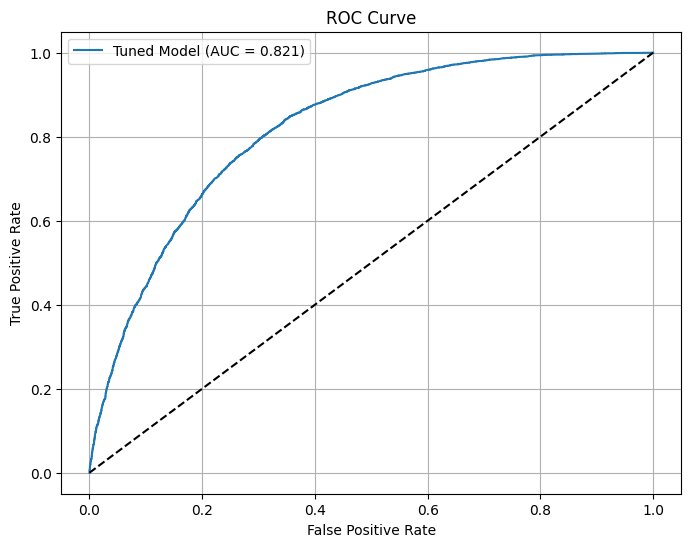

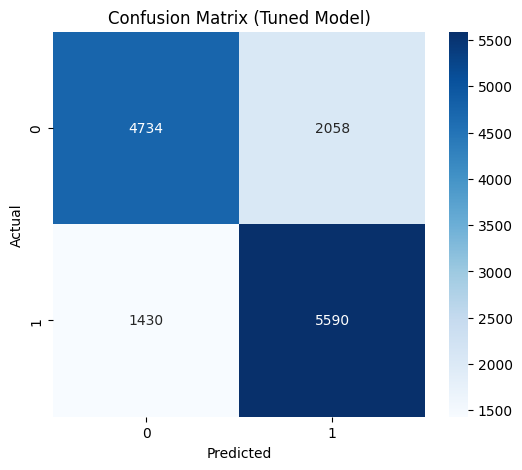

In [ ]:
# Predict on test set
y_pred = best_model.predict(X_test_top)
y_proba = best_model.predict_proba(X_test_top)[:, 1]

# Classification report & ROC AUC
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Tuned ROC AUC (Test Set):", roc_auc_score(y_test, y_proba))

# Cross-validation Accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_top, y_train, cv=cv, scoring="accuracy")
print("Cross-validated Accuracy scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Optional: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned Model (AUC = {roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned Model)")
plt.show()

## Model Evaluation: XGBoost (Untuned vs. Tuned with Top Features)

Below is a comparison between the **untuned** and **tuned** XGBoost models, each trained on the same top 8 SHAP-selected features.

---

### 1. Performance Comparison

| Metric                    | Untuned XGBoost | Tuned XGBoost  |
|---------------------------|-----------------|----------------|
| **Accuracy (Test Set)**   | 74%             | 75%            |
| **ROC AUC (Test Set)**    | 0.815           | 0.820          |
| **F1 Score (Class 1)**    | 0.76            | 0.76           |
| **Recall (Class 1)**      | 0.79            | 0.80           |
| **False Negatives (FN)**  | 1,458           | 1,435          |
| **CV Accuracy (5-Fold)**  | 0.742 ± 0.004   | 0.746 ± 0.003  |

- **Accuracy**: Tuned model rises from 74% → 75%  
- **ROC AUC**: Tuned model from 0.815 → 0.820  
- **Recall**: Tuned model from 0.79 → 0.80 (fewer missed diabetic cases)  
- **False Negatives**: Reduced from 1,458 → 1,435 with tuning  
- **Cross-Validated Accuracy**: 0.742 → 0.746 (five-fold)

---

### 2. Hyperparameter Tuning Details

Using `RandomizedSearchCV` (30 iterations, 5-fold CV, optimizing ROC AUC), the best parameters found were:

{
'subsample': 0.6,
'n_estimators': 200,
'min_child_weight': 3,
'max_depth': 5,
'learning_rate': 0.05,
'gamma': 1.0,
'colsample_bytree': 0.6
}


- **subsample=0.6** and **colsample_bytree=0.6**: reduces overfitting by sampling subsets of rows/columns  
- **n_estimators=200**: balances tree quantity with compute time  
- **max_depth=5** and **min_child_weight=3**: limit tree complexity to prevent overfitting  
- **learning_rate=0.05**: smaller step size for stable convergence  
- **gamma=1.0**: adds regularization to prune low-gain leaves

---

### 3. Best Model

**Tuned XGBoost** is the best choice because:

- It achieves the **highest ROC AUC (0.820)** on the test set.  
- It produces the **lowest false negatives** (1,435) compared to untuned (1,458).  
- It maintains **strong recall (0.80)**, critical for catching diabetic cases.  
- It improves **cross-validated accuracy** (0.746 vs. 0.742).  

---

### 4. Conclusion & Reasoning

1. **Why XGBoost?**  
   - Consistently top-performing in AUC, recall, and F1.  
   - Gains from gradient boosting regularization and handling of complex patterns.

2. **Why Tuning Helps?**  
   - Carefully selected hyperparameters led to a measurable uplift in ROC AUC (0.815 → 0.820).  
   - Lower false negatives means fewer missed diabetic predictions—vital in healthcare applications.  
   - Slight CV accuracy improvement (0.742 → 0.746) indicates better generalization.

3. **Deployment Recommendation**  
   - Deploy **Tuned XGBoost** (using only the top 8 SHAP features).  
   - This configuration balances **predictive performance**, **recall of positive cases**, and **model efficiency**.  
   - Fewer features + optimized hyperparameters yield a faster, more interpretable, and accurate model suitable for real-world healthcare settings.


# Save Model

In [ ]:
import joblib
joblib.dump(best_model, "final_xgb_diabetes_model.pkl")


['final_xgb_diabetes_model.pkl']

In [ ]:
# Save the scaler used for transforming selected numerical features
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
## Prepare cleaned dataset for Tableau
## Save to CSV
df_cleaned.to_csv("cleaned_diabetes_dataset.csv", index=False)


In [ ]:
features_scaled_for_app = ["GenHlth", "BMI", "Age", "Income"]
scaler_app = StandardScaler()
scaler_app.fit(X_train[features_scaled_for_app])

# Save it
joblib.dump(scaler_app, "scaler_app.pkl")


['scaler_app.pkl']

# Recommendations for Future Improvement

Based on the current evaluation and tuning of XGBoost (using the top SHAP‐selected features), here are several actionable recommendations to further enhance model performance and robustness:

---

### 1. Expand Hyperparameter Search & Tuning

- **Broaden Search Space**  
  - Add additional hyperparameter ranges (e.g., `learning_rate` down to 0.005 or up to 0.3).  
  - Include parameters like `reg_alpha` and `reg_lambda` for L1/L2 regularization.  
  - Experiment with alternative `booster` types (e.g., `dart` or `gblinear`).

- **Increase Iterations or Use Bayesian Optimization**  
  - Raise `n_iter` in `RandomizedSearchCV` from 30 → 100 or more to sample more combinations.  
  - Consider using a Bayesian optimizer (e.g., Optuna, Hyperopt) to converge on optimal hyperparameters faster.

- **Nested Cross‐Validation**  
  - Wrap the hyperparameter search inside an outer cross‐validation loop to better estimate generalization and avoid overfitting to CV folds.

---

### 2. Explore Additional Gradient-Boosting Frameworks

- **LightGBM**  
  - Often faster and more memory-efficient than XGBoost on large datasets.  
  - Try LightGBM’s `num_leaves`, `max_depth`, and `min_data_in_leaf` parameters.

- **CatBoost**  
  - Handles categorical variables natively (e.g., “GenHlth” ordinal categories) without one-hot encoding.  
  - Explore CatBoost’s built-in feature importance and automatic handling of missing values.

- **Ensemble Stacking**  
  - Combine predictions from XGBoost, LightGBM, and CatBoost in a meta‐learner (e.g., logistic regression) to potentially boost overall performance.

---

### 3. Incorporate Additional Feature Engineering

- **Interaction Features**  
  - Create pairwise interactions (e.g., `BMI × Age`, `HighBP × HighChol`) to capture synergistic effects.  
  - Use domain knowledge: patients with both high blood pressure and high cholesterol may have a different risk profile.

- **Polynomial or Binned Transformations**  
  - For continuous inputs like BMI, consider polynomial expansions (e.g., BMI²) or binning (e.g., obese vs. overweight).  
  - For ordinal features (e.g., “Age” categories), create boolean flags for elderly groups (e.g., Age ≥ 11 for 70–74 and older).

- **Derived Health Metrics**  
  - If possible, compute Body Surface Area (BSA) from BMI or combine “Physical Health” and “Mental Health” into an overall “Wellness Score”.  
  - Aggregate binary variables: for example, combine `HighBP` and `HighChol` into a single “CardioRisk” column.

---

### 4. Address Class Imbalance & Calibration

- **Class Weighting or Focal Loss**  
  - Although the dataset is balanced in terms of diabetic vs. non-diabetic, you can explicitly set `scale_pos_weight` in XGBoost to emphasize recall.  
  - Alternatively, try focal loss or weighted logistic loss to further penalize false negatives.

- **Probability Calibration**  
  - Use calibration techniques (e.g., isotonic regression or Platt scaling) to ensure predicted probabilities align with actual observed risk.  
  - This is particularly important if downstream decisions rely on absolute risk thresholds (e.g., “Refer for glucose test if P(diabetes) > 0.8”).

---

### 5. Incorporate External or Longitudinal Data

- **Lab Results or Vital Signs**  
  - If available, add real clinical measures (e.g., fasting glucose, HbA1c, blood pressure in mmHg, lipid panel) to enrich the feature set.  
  - Combining self-reported survey data with actual lab values can improve predictive accuracy.

- **Temporal Features**  
  - If multiple years of BRFSS data exist, create “trend” features (e.g., change in BMI or physical activity over time).  
  - Model longitudinal trajectories via recurrent models (e.g., LSTM) or temporal boosting techniques.

- **Geographic or Socioeconomic Context**  
  - Introduce county/state‐level variables (e.g., median income, access to healthcare facilities, rural vs. urban) to capture social determinants of health.

---

### 6. Try Alternative Algorithm Families

- **Neural Networks**  
  - A simple feed-forward network (with 1–2 hidden layers) may capture non-linear interactions that tree-based models miss.  
  - Use dropout and batch normalization to guard against overfitting.

- **Support Vector Machines (SVM) with Different Kernels**  
  - Already tested a linear SVM; experiment with RBF or polynomial kernels on the reduced feature set.  
  - Be mindful of training time and scalability on large datasets.

- **Regularized Logistic Regression**  
  - Apply `L1` (Lasso) or `L2` (Ridge) regularization to logistic regression for feature selection and stability.  
  - Compare performance to tree-based methods on the same feature set.

---

### 7. Perform Model Interpretability & Stress Testing

- **Advanced SHAP Analysis**  
  - Generate SHAP dependence plots for critical feature pairs (e.g., GenHlth vs. BMI).  
  - Use SHAP interaction values to quantify feature interactions explicitly.

- **Counterfactual Explanations**  
  - For borderline cases (e.g., probability ≈ 0.50), use counterfactual analysis to show minimal changes needed to flip a prediction (e.g., “If BMI decreases by 2 points, risk drops from 0.52 → 0.48”).

- **Stress Testing / Adversarial Scenarios**  
  - Simulate noisy or missing inputs (e.g., deliberately perturb “GenHlth” or “Income”) to gauge model robustness.  
  - Identify features that cause large shifts in output when slightly altered.

---

### 8. Monitor & Maintain in Production

- **Data Drift Detection**  
  - Build a dashboard to track input feature distributions over time (e.g., median BMI, proportion with HighBP).  
  - Set alerts when distribution shifts exceed a threshold, indicating retraining is needed.

- **Periodic Retraining**  
  - Schedule retraining every 3–6 months (or after collecting new labeled outcomes) to keep the model aligned with evolving population characteristics.

- **A/B Testing & Continuous Feedback**  
  - Deploy the model in a controlled environment (e.g., one subset of clinics) alongside the existing protocol.  
  - Collect clinician feedback and outcome data to measure impact (e.g., did the model catch early cases that otherwise would have been missed?).

---

### 9. Final Note on Model Selection

- Although XGBoost is currently the best‐performing model, it is wise to keep an **“algorithmic benchmark suite”** in place (e.g., Logistic Regression, Random Forest, LightGBM) so you can:
  - Quickly validate that any performance gains from new methods are genuine.
  - Provide interpretable fallback options if tree ensembles become too complex for regulatory review or offline audits.
